**MGMT 3450 Operations Management Simulation 1**

# IMPORT DATA into pandas dataframes

In [11]:
# import the inventory data and get a regression line that will work through day 150

# scratch that, get a line through day 42, days 43-50 throw off the regression line

import pandas as pd
import numpy as np
import sys
import scipy as sc
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

#open file inventory-full-days-1-50.csv with inventory data, removed partial days on day 43
inv = pd.read_csv('inventory-full-days-1-50.csv',)

print("Shape of inventory dataframe is ",inv.shape)

#remove the last 7 days because of new inventory arrival on day 44
inv = inv[:-7]

print("Shape of inventory dataframe is now ",inv.shape)

# now get job arrivals

#open file job-arrivals-days-1-50.csv with job arrival data
jobs = pd.read_csv('job-arrivals-days-1-50.csv')
jobs130 = pd.read_csv('day-130-orders.csv')
jobs198 = pd.read_csv('job-arrivals-days-150-213.csv')

print("Shape of job arrival dataframe is ",jobs.shape)
print("Shape of job arrival 130 days dataframe is ",jobs130.shape)
print("Shape of job arrival 150-213 days dataframe is ",jobs198.shape)


Shape of inventory dataframe is  (50, 2)
Shape of inventory dataframe is now  (43, 2)
Shape of job arrival dataframe is  (50, 2)
Shape of job arrival 130 days dataframe is  (130, 2)
Shape of job arrival 150-213 days dataframe is  (64, 2)


# Regression on initial inventory draw-down

                            OLS Regression Results                            
Dep. Variable:              Inventory   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2676.
Date:                Mon, 18 Sep 2017   Prob (F-statistic):           5.75e-39
Time:                        08:10:59   Log-Likelihood:                -294.27
No. Observations:                  43   AIC:                             592.5
Df Residuals:                      41   BIC:                             596.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.017e+04     72.124    140.976      0.0

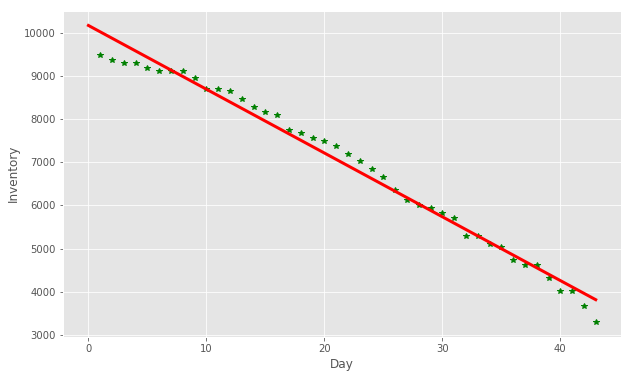

The model is:
              Inventory Level = 10167.7076 + -147.7076 * Day.
r-squared value = 0.9849 (measure of fit)
standard error = 2.8554


In [12]:
# do regression and chart for inventory in this cell

model = sm.ols(formula="Inventory ~ Day", data=inv)
model_result = model.fit()
print(model_result.summary());

day = inv['Day']
inventory = inv['Inventory']

# make listPrice and soldPrice earlier

plt.plot(day,inventory,'g*')

# adapted from http://localhost:8843/notebooks/05-linear-regression.ipynb cell 
# and http://localhost:8869/notebooks/06-regression-2.ipynb
lrDayToInv = linregress(x=day, y=inventory)
print(lrDayToInv)

x = sc.linspace(0,max(day),1000)

# the stats version of y = mx + b
plt.plot(x,lrDayToInv.intercept + lrDayToInv.slope*x,'r',linewidth=3)
plt.xlabel('Day')
plt.ylabel('Inventory')
plt.show()

print('The model is:') 


print('              Inventory Level = ' + str(round(lrDayToInv.intercept,4)) + ' + ' + str(round(lrDayToInv.slope,4)) + ' * Day.')
print("r-squared value = " + str(round(lrDayToInv.rvalue**2,4)) + " (measure of fit)")
print("standard error = " + str(round(lrDayToInv.stderr,4)))




# Predicting orders / demand beyond day 50

                            OLS Regression Results                            
Dep. Variable:             JobArrival   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     6.387
Date:                Mon, 18 Sep 2017   Prob (F-statistic):             0.0148
Time:                        08:11:00   Log-Likelihood:                -97.596
No. Observations:                  50   AIC:                             199.2
Df Residuals:                      48   BIC:                             203.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4016      0.499      2.807      0.0

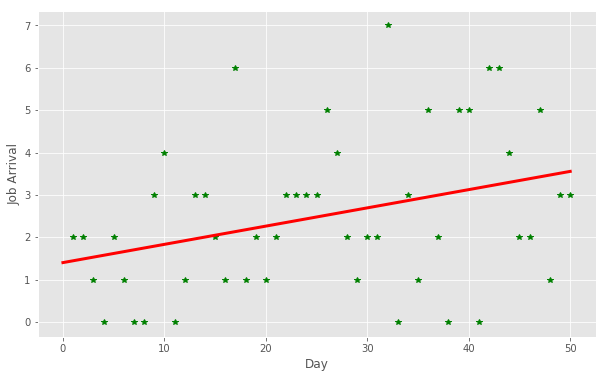

The model is:
              Job Arrivals = 1.4016 + 0.0431 * Day.
r-squared value = 0.1174 (measure of fit)
standard error = 0.017


In [13]:
# do regression and chart for job arrivals in this cell

model = sm.ols(formula="JobArrival ~ Day", data=jobs)
model_result = model.fit()
print(model_result.summary());

day = jobs['Day']
jobArrival = jobs['JobArrival']

# make listPrice and soldPrice earlier

plt.plot(day,jobArrival,'g*')

# adapted from http://localhost:8843/notebooks/05-linear-regression.ipynb cell 
# and http://localhost:8869/notebooks/06-regression-2.ipynb
lrDayToArrival = linregress(x=day, y=jobArrival)
print(lrDayToArrival)

x = sc.linspace(0,max(day),1000)

# the stats version of y = mx + b
plt.plot(x,lrDayToArrival.intercept + lrDayToArrival.slope*x,'r',linewidth=3)
plt.xlabel('Day')
plt.ylabel('Job Arrival')
plt.show()

print('The model is:') 


print('              Job Arrivals = ' + str(round(lrDayToArrival.intercept,4)) + ' + ' + str(round(lrDayToArrival.slope,4)) + ' * Day.')
print("r-squared value = " + str(round(lrDayToArrival.rvalue**2,4)) + " (measure of fit)")
print("standard error = " + str(round(lrDayToArrival.stderr,4)))

# Predict demand to day 150 based on 130 days of data

                            OLS Regression Results                            
Dep. Variable:             JobArrival   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     174.2
Date:                Mon, 18 Sep 2017   Prob (F-statistic):           1.23e-25
Time:                        08:11:01   Log-Likelihood:                -293.17
No. Observations:                 130   AIC:                             590.3
Df Residuals:                     128   BIC:                             596.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7782      0.410      1.897      0.0

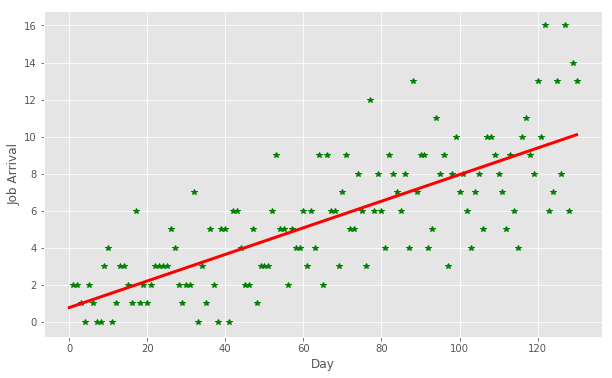

The model is:
              Job Arrivals = 0.7782 + 0.0717 * Day.
r-squared value = 0.5764 (measure of fit)
standard error = 0.0054


In [14]:
# do it again with 130 days of orders, compare formulas and predict for day 150

# do regression and chart for job arrivals in this cell

model = sm.ols(formula="JobArrival ~ Day", data=jobs130)
model_result = model.fit()
print(model_result.summary());

day = jobs130['Day']
jobArrival = jobs130['JobArrival']

# make listPrice and soldPrice earlier

plt.plot(day,jobArrival,'g*')

# adapted from http://localhost:8843/notebooks/05-linear-regression.ipynb cell 
# and http://localhost:8869/notebooks/06-regression-2.ipynb
lrDayToArrival = linregress(x=day, y=jobArrival)
print(lrDayToArrival)

x = sc.linspace(0,max(day),1000)

# the stats version of y = mx + b
plt.plot(x,lrDayToArrival.intercept + lrDayToArrival.slope*x,'r',linewidth=3)
plt.xlabel('Day')
plt.ylabel('Job Arrival')
plt.show()

print('The model is:') 


print('              Job Arrivals = ' + str(round(lrDayToArrival.intercept,4)) + ' + ' + str(round(lrDayToArrival.slope,4)) + ' * Day.')
print("r-squared value = " + str(round(lrDayToArrival.rvalue**2,4)) + " (measure of fit)")
print("standard error = " + str(round(lrDayToArrival.stderr,4)))

In [15]:
# estimate job orders on days 130 to 150 and add them up

days = list(range(130,150))
orders = [lrDayToArrival.intercept + x * lrDayToArrival.slope for x in days]
print([str(round(x,2)) for x in orders])
orders130to150 = str(round(sum(orders)))
print("Orders Day 130 through Day 150 total: " + orders130to150)
print("Assuming level demand the next 30 days, orders Day 150 to Day 180 will be: " + str(30 * round(orders[-1])))



['10.1', '10.18', '10.25', '10.32', '10.39', '10.46', '10.53', '10.61', '10.68', '10.75', '10.82', '10.89', '10.96', '11.04', '11.11', '11.18', '11.25', '11.32', '11.4', '11.47']
Orders Day 130 through Day 150 total: 216.0
Assuming level demand the next 30 days, orders Day 150 to Day 180 will be: 330.0


# Predict demand draw-down as game wraps up

                            OLS Regression Results                            
Dep. Variable:             JobArrival   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     18.77
Date:                Mon, 18 Sep 2017   Prob (F-statistic):           5.49e-05
Time:                        08:11:01   Log-Likelihood:                -161.80
No. Observations:                  64   AIC:                             327.6
Df Residuals:                      62   BIC:                             331.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.6580      3.803      7.273      0.0

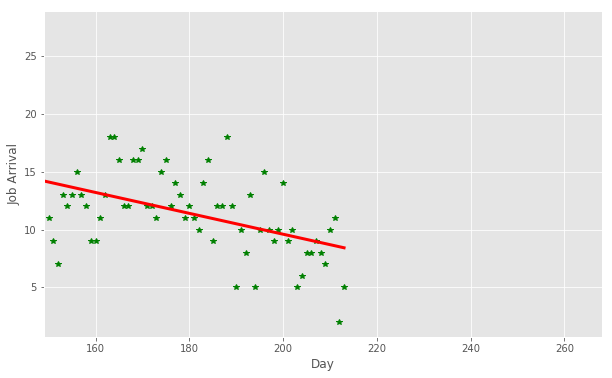

The model is:
              Job Arrivals = 27.658 + -0.0903 * Day.
r-squared value = 0.2324 (measure of fit)
standard error = 0.0208


In [16]:
# now looking at demand dropoff for days 150 to 213

# file is job-arrivals-days-150-213.csv

model = sm.ols(formula="JobArrival ~ Day", data=jobs198)
model_result = model.fit()
print(model_result.summary());

day = jobs198['Day']
jobArrival = jobs198['JobArrival']

# make listPrice and soldPrice earlier

plt.plot(day,jobArrival,'g*')

# adapted from http://localhost:8843/notebooks/05-linear-regression.ipynb cell 
# and http://localhost:8869/notebooks/06-regression-2.ipynb
lrDayToArrival = linregress(x=day, y=jobArrival)
print(lrDayToArrival)

x = sc.linspace(0,max(day),1000)

# the stats version of y = mx + b
plt.plot(x,lrDayToArrival.intercept + lrDayToArrival.slope*x,'r',linewidth=3)
plt.xlim(149, 268)
plt.xlabel('Day')
plt.ylabel('Job Arrival')
plt.show()

print('The model is:') 


print('              Job Arrivals = ' + str(round(lrDayToArrival.intercept,4)) + ' + ' + str(round(lrDayToArrival.slope,4)) + ' * Day.')
print("r-squared value = " + str(round(lrDayToArrival.rvalue**2,4)) + " (measure of fit)")
print("standard error = " + str(round(lrDayToArrival.stderr,4)))

# Game wrap-up decisions and demand prediction

Looking over the last 50 days, when we only had data to day 198, there looked like be an average of 10 orders per day

10 orders * 60 kits per order * 50 days = 30,000 kits

At \$16.67 per kit that's \$500K+ revenue on let's say 4 inventory re-orders \$73K X 4 = \$292K, for \$208K profit. Then at the end any unsold inventory is sold off. We can only get \$20-30K back by selling machines, risking a \$208K profit. Assuming that rate of 10 orders per day on average, it looked better to keep all machines.

# Now with data through day 213 it looks different

Now that we have data to day 213, it's looking more like an average of 7.5 orders per day. Doing the math:

7.5 orders * 60 kits per order * 50 days = 22,500 kits. That's \$375K+ revenue on \$214K inventory costs, for \$161K profit.

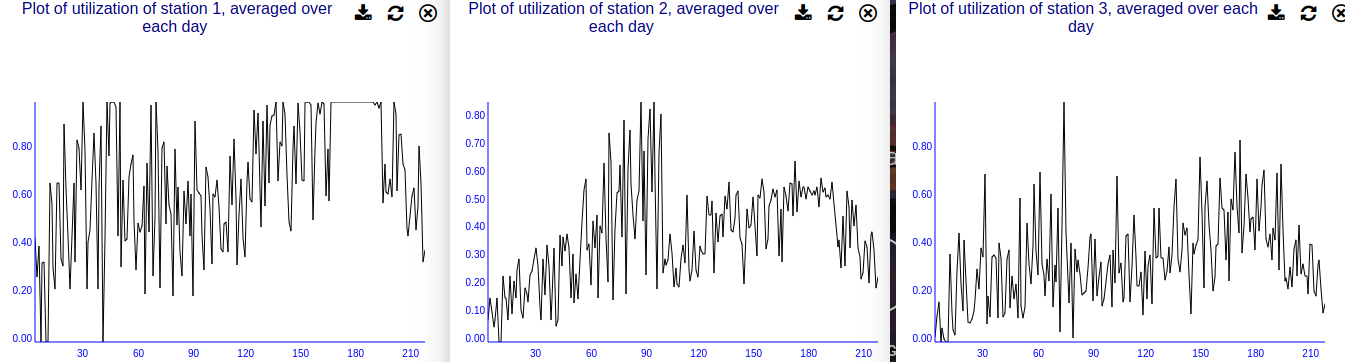

Utilization is low enough on stations 2 and 3 to sell off a machine at each station and the trend looks like it's not going to pick back up so I suggest we sell 1 one machine at each station, leaving 2 at Station 1 and 1 each at Stations 2 and 3. This will bring in an extra \$30K.
